In [1]:
import numpy as np
import pandas as pd
import matplotlib
from datetime import datetime
import statistics
import os
import warnings
# import sweetviz as sv
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt, seaborn as sns
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, feature_extraction
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()
df = pd.read_csv('data_prep_DT_RF.csv', sep=',', encoding='latin1', parse_dates=False)
df.head()

,ad_id,vehicle_type,title,make,model,variant,title_with_manufactured_year,manufactured_year,posted_date,reg_date,...,power_bin,Time_taken_to_sell_days,Time_taken_to_sell_months,Time_taken_to_sell_weeks,Time_taken_to_sell_classficationtype_test_3,coe_category,Time_taken_to_sell_classficationtype_test_1,Time_taken_to_sell_classficationtype_test_2,Time_taken_to_sell_classficationtype_test_4,Time_taken_to_sell_classficationtype_test_5
0,1077001,luxury sedan,bmw 5 series 520i luxury,bmw,5 series,520i luxury,BMW 5 Series 520i Luxury [2013],Other_manufactured_year,2022-03-26,2014-03-31,...,7.131 - 160,165 days,5.500000,23.571429,Not sold within Three Weeks,B,Not sold within Two Weeks,Not sold within Two Weeks,Not sold within Ten Weeks,Not sold within Thirty Weeks
1,1068745,hatchback,bmw 1 series 116d,bmw,1 series,116d,BMW 1 Series 116d [2015],2015,2022-04-24,2015-12-29,...,2.81 - 85,131 days,4.366667,18.714286,Not sold within Three Weeks,A,Not sold within Two Weeks,Not sold within Two Weeks,Not sold within Ten Weeks,Not sold within Thirty Weeks
2,1068742,luxury sedan,bentley continental flying spur 6.0a,Other make,continental flying spur,6.0a,Bentley Continental Flying Spur 6.0A [2005],Other_manufactured_year,2022-04-28,2005-11-28,...,11.Above 301,127 days,4.233333,18.142857,Not sold within Three Weeks,B,Not sold within Two Weeks,Not sold within Two Weeks,Not sold within Ten Weeks,Not sold within Thirty Weeks
3,1030012,luxury sedan,honda accord 2.0a,honda,accord,2.0a,Honda Accord 2.0A [2006],Other_manufactured_year,2022-04-28,2006-09-05,...,6.101 - 130,127 days,4.233333,18.142857,Not sold within Three Weeks,B,Not sold within Two Weeks,Not sold within Two Weeks,Not sold within Ten Weeks,Not sold within Thirty Weeks
4,1042799,suv,volkswagen tiguan 2.0a tsi,volkswagen,tiguan,2.0a tsi,Volkswagen Tiguan 2.0A TSI [2010],Other_manufactured_year,2022-06-22,2011-02-25,...,6.101 - 130,77 days,2.566667,11.000000,Not sold within Three Weeks,B,Not sold within Two Weeks,Not sold within Two Weeks,Not sold within Ten Weeks,Sold in Less Than Thirtry Weeks


# Basic Settings

In [ ]:
# setting ad_id as the index
df.set_index('ad_id', inplace=True)
df.head()

,vehicle_type,title,make,model,variant,title_with_manufactured_year,manufactured_year,posted_date,reg_date,scrape_date,updated_date,category,parf/coe,opc/non-opc,consignment/non-consignment,direct owner/dealer,depreciation,price,status,url,mileage,road_tax,transmission,dereg_value,omv,coe,arf,engine_capacity,power,curb_weight,no_of_owners,Cat_Type,COE_of_the_month_in_2022,vehicle_age,Update-Posted Date Range,CAT_Almost_New_Car,CAT_Low_Mileage_Car,CAT_Premium_Ad_Car,CAT_Hybrid_Cars,CAT_Sgcarmart_Warranty_Cars,depreciation_bin,price_bin,mileage_bin,vehicle_age_group,Continental,CAT_Electric,COE_Category,road_tax_bin,omv_smallbin,engine_capacity_bin,power_bin,Time_taken_to_sell_days,Time_taken_to_sell_months,Time_taken_to_sell_weeks,Time_taken_to_sell_classficationtype_test_3,coe_category,Time_taken_to_sell_classficationtype_test_1,Time_taken_to_sell_classficationtype_test_2,Time_taken_to_sell_classficationtype_test_4,Time_taken_to_sell_classficationtype_test_5
ad_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077001,luxury sedan,bmw 5 series 520i luxury,bmw,5 series,520i luxury,BMW 5 Series 520i Luxury [2013],Other_manufactured_year,2022-03-26,2014-03-31,2022-09-11,2022-09-07,"PARF Car, Direct Owner Sale",PARF,Non-OPC,Non-consignment,Direct owner,26910.0,68800.0,Available for sale.,https://www.sgcarmart.com/used_cars/info.php?I...,143000.0,1210.0,Auto,42394.0,47529.0,82900.0,53541.0,1997.0,135.0,1615.0,4.0,Category B,110526,9.0,165 days,N,N,N,N,N,24510.0-28870.0,68800.0-73777.0,140455.0-160900.0,8.0-9.0,1,0,Category B,6.1001 - 1250,3.40001 - 60000,5.1801 - 2000,7.131 - 160,165 days,5.500000,23.571429,Not sold within Three Weeks,B,Not sold within Two Weeks,Not sold within Two Weeks,Not sold within Ten Weeks,Not sold within Thirty Weeks
1068745,hatchback,bmw 1 series 116d,bmw,1 series,116d,BMW 1 Series 116d [2015],2015,2022-04-24,2015-12-29,2022-09-11,2022-09-02,PARF Car,PARF,Non-OPC,Non-consignment,Dealer,14980.0,54888.0,Available for sale.,https://www.sgcarmart.com/used_cars/info.php?I...,NaN,1082.0,Auto,24671.0,23732.0,57501.0,10225.0,1496.0,85.0,1350.0,2.0,Category A,85000,7.0,131 days,N,N,N,N,N,14160.0-14980.0,52800.0-58778.0,NaN,7.0-7.0,1,0,Category A,6.1001 - 1250,1.20001 - 30000,2.1401 - 1500,2.81 - 85,131 days,4.366667,18.714286,Not sold within Three Weeks,A,Not sold within Two Weeks,Not sold within Two Weeks,Not sold within Ten Weeks,Not sold within Thirty Weeks
1068742,luxury sedan,bentley continental flying spur 6.0a,Other make,continental flying spur,6.0a,Bentley Continental Flying Spur 6.0A [2005],Other_manufactured_year,2022-04-28,2005-11-28,2022-09-11,2022-09-02,COE Car,COE,Non-OPC,Non-consignment,Dealer,58330.0,188888.0,Available for sale.,https://www.sgcarmart.com/used_cars/info.php?I...,NaN,10611.0,Auto,NaN,192662.0,60519.0,211929.0,5998.0,412.0,2525.0,5.0,Category B,110526,17.0,127 days,N,N,N,N,N,40640.0-2260060.0,170000.0-199777.0,NaN,14.0-187.0,1,0,Category B,10.Above 3001,5.Above 80001,8.Above 3001,11.Above 301,127 days,4.233333,18.142857,Not sold within Three Weeks,B,Not sold within Two Weeks,Not sold within Two Weeks,Not sold within Ten Weeks,Not sold within Thirty Weeks
1030012,luxury sedan,honda accord 2.0a,honda,accord,2.0a,Honda Accord 2.0A [2006],Other_manufactured_year,2022-04-28,2006-09-05,2022-09-11,2022-09-02,"COE Car, Premium Ad Car",COE,Non-OPC,Non-consignment,Dealer,11470.0,43888.0,Available for sale.,https://www.sgcarmart.com/used_cars/info.php?I...,NaN,1815.0,Auto,18555.0,26549.0,48479.0,29204.0,1998.0,110.0,1435.0,3.0,Category B,110526,16.0,127 days,N,N,Y,N,N,11240.0-11830.0,33800.0-45400.0,NaN,14.0-187.0,0,0,Category B,8.1501 - 2000,1.20001 - 30000,5.1801 - 2000,6.101 - 130,127 days,4.233333,18.142857,Not sold within Three Weeks,B,Not sold within Two Weeks,Not sold within Two Weeks,Not sold within Ten Weeks,Not sold within Thirty Weeks
1042799,suv,volkswagen tiguan 2.0a tsi,volkswagen,tiguan,2.0a tsi,Volkswagen Tiguan 2.0A TSI [2010],Other_manufactured_year,2022-06-22,2011-

# Preparation for Decision Tree and Random Forest

In [ ]:
# Columns to drop as they will not be used
columns_to_drop = ['Time_taken_to_sell_classficationtype_test_1', 'Time_taken_to_sell_classficationtype_test_2',
                   'Time_taken_to_sell_classficationtype_test_4', 'Time_taken_to_sell_classficationtype_test_5',
                   'url', 'mileage', 'curb_weight', 'COE_Category', 'Time_taken_to_sell_days', 'Time_taken_to_sell_months',
                   'Time_taken_to_sell_weeks', 'Cat_Type', 'depreciation', 'status', 'category', 'posted_date', 'reg_date',
                   'scrape_date', 'updated_date', 'variant', 'title_with_manufactured_year', 'title', 'model', 'road_tax',
                   'dereg_value', 'omv', 'engine_capacity', 'power','Update-Posted Date Range', 'price']

for x in columns_to_drop:
    if x in df.columns:
        df=df.drop(columns=x)

In [ ]:
# Project will not be focusing on Truck, Van, Bus/Mini-Bus and Other(Antique Cars)
vehicle_types_to_drop = ['van', 'truck', 'other', 'bus/mini bus']
df = df[~df['vehicle_type'].isin(vehicle_types_to_drop)]

In [ ]:
# dropping rows where columns mentioned below are null as it is not suitable to put 'Unknown" into these rows
df = df.dropna(subset=['price_bin'])
df = df.dropna(subset=['coe'])
df = df.dropna(subset=['arf'])
df = df.dropna(subset=['coe_category'])

In [ ]:
# select columns with Dtype='category' and changing them to Dtype='object'
categorical_columns = df.select_dtypes('category').columns
df[categorical_columns] = df[categorical_columns].astype('object')
df['no_of_owners'] = df['no_of_owners'].astype(object)

# select columns with Dtype='object' and changing them to Dtype='float'
df['COE_of_the_month_in_2022'] = df['COE_of_the_month_in_2022'].astype(float)

In [ ]:
# assigning data_input and data_target for the project
last_column_name = df.columns[-1]
df = df[[last_column_name] + [col for col in df.columns if col != last_column_name]]

input_cols = list(df.columns)[:-1]
target_col = 'Time_taken_to_sell_classficationtype_test_3'

data_inputs = df[input_cols].copy()
data_targets = df[target_col].copy()

data_inputs

,coe_category,vehicle_type,make,manufactured_year,parf/coe,opc/non-opc,consignment/non-consignment,direct owner/dealer,transmission,coe,arf,no_of_owners,COE_of_the_month_in_2022,vehicle_age,CAT_Almost_New_Car,CAT_Low_Mileage_Car,CAT_Premium_Ad_Car,CAT_Hybrid_Cars,CAT_Sgcarmart_Warranty_Cars,depreciation_bin,price_bin,mileage_bin,vehicle_age_group,Continental,CAT_Electric,road_tax_bin,omv_smallbin,engine_capacity_bin,power_bin
ad_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077001,B,luxury sedan,bmw,Other_manufactured_year,PARF,Non-OPC,Non-consignment,Direct owner,Auto,82900.0,53541.0,4.0,110526.0,9.0,N,N,N,N,N,24510.0-28870.0,68800.0-73777.0,140455.0-160900.0,8.0-9.0,1,0,6.1001 - 1250,3.40001 - 60000,5.1801 - 2000,7.131 - 160
1068745,A,hatchback,bmw,2015,PARF,Non-OPC,Non-consignment,Dealer,Auto,57501.0,10225.0,2.0,85000.0,7.0,N,N,N,N,N,14160.0-14980.0,52800.0-58778.0,NaN,7.0-7.0,1,0,6.1001 - 1250,1.20001 - 30000,2.1401 - 1500,2.81 - 85
1068742,B,luxury sedan,Other make,Other_manufactured_year,COE,Non-OPC,Non-consignment,Dealer,Auto,60519.0,211929.0,5.0,110526.0,17.0,N,N,N,N,N,40640.0-2260060.0,170000.0-199777.0,NaN,14.0-187.0,1,0,10.Above 3001,5.Above 80001,8.Above 3001,11.Above 301
1030012,B,luxury sedan,honda,Other_manufactured_year,COE,Non-OPC,Non-consignment,Dealer,Auto,48479.0,29204.0,3.0,110526.0,16.0,N,N,Y,N,N,11240.0-11830.0,33800.0-45400.0,NaN,14.0-187.0,0,0,8.1501 - 2000,1.20001 - 30000,5.1801 - 2000,6.101 - 130
1042799,B,suv,volkswagen,Other_manufactured_year,COE,Non-OPC,Non-consignment,Dealer,Auto,20357.0,26792.0,3.0,110526.0,12.0,N,N,N,N,N,NaN,33800.0-45400.0,NaN,12.0-12.0,1,0,7.1251 - 1500,1.20001 - 30000,5.1801 - 2000,6.101 - 130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085074,A,hatchback,mercedes-benz,2015,PARF,Non-OPC,Non-consignment,Dealer,Auto,57199.0,18287.0,3.0,74395.0,7.0,N,N,N,N,N,NaN,52800.0-58778.0,NaN,7.0-7.0,1,0,3.701 - 800,1.20001 - 30000,3.1501 - 1600,3.86 - 90
1108708,A,suv,nissan,2017,PARF,Non-OPC,Non-consignment,Dealer,Auto,45201.0,13583.0,2.0,74395.0,5.0,N,N,N,N,N,NaN,68800.0-73777.0,NaN,5.0-5.0,0,0,1.501 - 600,0.Below 20000,0.Below 1300,2.81 - 85
1089915,B,suv,nissan,2020,PARF,Non-OPC,Non-consignment,Dealer,Auto,30890.0,27297.0,1.0,103343.0,2.0,N,Y,N,N,N,NaN,118800.0-132778.0,NaN,2.0-2.0,0,0,6.1001 - 1250,1.20001 - 30000,5.1801 - 2000,6.101 - 130


In [ ]:
# checkpoint to see if changes are implemented
data_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29442 entries, 1077001 to 1089661
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   coe_category                 29442 non-null  object 
 1   vehicle_type                 29442 non-null  object 
 2   make                         29442 non-null  object 
 3   manufactured_year            29442 non-null  object 
 4   parf/coe                     29442 non-null  object 
 5   opc/non-opc                  29442 non-null  object 
 6   consignment/non-consignment  29442 non-null  object 
 7   direct owner/dealer          29442 non-null  object 
 8   transmission                 29442 non-null  object 
 9   coe                          29442 non-null  float64
 10  arf                          29442 non-null  float64
 11  no_of_owners                 29425 non-null  object 
 12  COE_of_the_month_in_2022     29442 non-null  float64
 13  vehicle_

In [ ]:
# Selecting numeric columns and categorical columns
categorical_cols = data_inputs.select_dtypes('object').columns.tolist()
numeric_cols = data_inputs.select_dtypes(include=np.number).columns.tolist()

print(f"Numeric Features are: {numeric_cols}")
print(f"Categorical Features are: {categorical_cols}")

Numeric Features are: ['coe', 'arf', 'COE_of_the_month_in_2022', 'vehicle_age', 'Continental', 'CAT_Electric']
Categorical Features are: ['coe_category', 'vehicle_type', 'make', 'manufactured_year', 'parf/coe', 'opc/non-opc', 'consignment/non-consignment', 'direct owner/dealer', 'transmission', 'no_of_owners', 'CAT_Almost_New_Car', 'CAT_Low_Mileage_Car', 'CAT_Premium_Ad_Car', 'CAT_Hybrid_Cars', 'CAT_Sgcarmart_Warranty_Cars', 'depreciation_bin', 'price_bin', 'mileage_bin', 'vehicle_age_group', 'road_tax_bin', 'omv_smallbin', 'engine_capacity_bin', 'power_bin']


In [ ]:
# Scaling Numeric Features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(data_inputs[numeric_cols])
data_inputs[numeric_cols] = scaler.transform(df[numeric_cols])

In [ ]:
# Encoding Categorical Features
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(data_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
data_inputs[encoded_cols] = encoder.transform(data_inputs[categorical_cols])

In [ ]:
# Concantenate the columns together
data_inputs = data_inputs[numeric_cols + encoded_cols]

data_inputs.head(5)

,coe,arf,COE_of_the_month_in_2022,vehicle_age,Continental,CAT_Electric,coe_category_A,coe_category_B,vehicle_type_hatchback,vehicle_type_luxury sedan,vehicle_type_mid-sized sedan,vehicle_type_mpv,vehicle_type_others,vehicle_type_sports car,vehicle_type_stationwagon,vehicle_type_suv,make_Other make,make_audi,make_bmw,make_honda,make_hyundai,make_kia,make_lexus,make_mazda,make_mercedes-benz,make_mitsubishi,make_nissan,make_porsche,make_subaru,make_suzuki,make_toyota,make_volkswagen,manufactured_year_2008,manufactured_year_2009,manufactured_year_2014,manufactured_year_2015,manufactured_year_2016,manufactured_year_2017,manufactured_year_2018,manufactured_year_2019,manufactured_year_2020,manufactured_year_2021,manufactured_year_Other_manufactured_year,parf/coe_COE,parf/coe_PARF,opc/non-opc_Non-OPC,opc/non-opc_OPC,consignment/non-consignment_Consignment,consignment/non-consignment_Non-consignment,direct owner/dealer_Dealer,direct owner/dealer_Direct owner,transmission_Auto,transmission_Manual,no_of_owners_1.0,no_of_owners_2.0,no_of_owners_3.0,no_of_owners_4.0,no_of_owners_5.0,no_of_owners_6.0,no_of_owners_nan,CAT_Almost_New_Car_N,CAT_Almost_New_Car_Y,CAT_Low_Mileage_Car_N,CAT_Low_Mileage_Car_Y,CAT_Premium_Ad_Car_N,CAT_Premium_Ad_Car_Y,CAT_Hybrid_Cars_N,CAT_Hybrid_Cars_Y,CAT_Sgcarmart_Warranty_Cars_N,CAT_Sgcarmart_Warranty_Cars_Y,depreciation_bin_10630.0-11230.0,depreciation_bin_11240.0-11830.0,depreciation_bin_11840.0-12390.0,depreciation_bin_12400.0-12930.0,depreciation_bin_12940.0-13530.0,depreciation_bin_13540.0-14150.0,depreciation_bin_14160.0-14980.0,depreciation_bin_14990.0-16060.0,depreciation_bin_16070.0-17180.0,depreciation_bin_17190.0-18440.0,depreciation_bin_18450.0-19850.0,depreciation_bin_19860.0-21910.0,depreciation_bin_21920.0-24500.0,depreciation_bin_24510.0-28870.0,depreciation_bin_28880.0-40630.0,depreciation_bin_3880.0-8880.0,depreciation_bin_40640.0-2260060.0,depreciation_bin_8890.0-9970.0,depreciation_bin_9980.0-10620.0,depreciation_bin_nan,price_bin_107100.0-118778.0,price_bin_118800.0-132778.0,price_bin_132800.0-149777.0,price_bin_149800.0-169999.0,price_bin_170000.0-199777.0,price_bin_19400.0-33688.0,price_bin_199800.0-278800.0,price_bin_278888.0-3588888.0,price_bin_33800.0-45400.0,price_bin_45500.0-52777.0,price_bin_52800.0-58778.0,price_bin_58800.0-63787.0,price_bin_63800.0-68799.0,price_bin_68800.0-73777.0,price_bin_73800.0-78787.0,price_bin_78800.0-84778.0,price_bin_84800.0-90777.0,price_bin_90800.0-98777.0,price_bin_98800.0-107000.0,price_bin_999.0-19388.0,mileage_bin_1.0-999.0,mileage_bin_1000.0-9723.0,mileage_bin_106524.0-116983.0,mileage_bin_117000.0-128955.0,mileage_bin_129000.0-140454.0,mileage_bin_140455.0-160900.0,mileage_bin_16000.0-22644.0,mileage_bin_161000.0-1300000.0,mileage_bin_22669.0-29999.0,mileage_bin_30000.0-37985.0,mileage_bin_38000.0-44988.0,mileage_bin_45000.0-52965.0,mileage_bin_53000.0-59961.0,mileage_bin_60000.0-67488.0,mileage_bin_67500.0-74999.0,mileage_bin_75000.0-81671.0,mileage_bin_81686.0-88966.0,mileage_bin_89000.0-96900.0,mileage_bin_97000.0-106519.0,mileage_bin_9800.0-15999.0,mileage_bin_nan,vehicle_age_group_0.0-0.0,vehicle_age_group_1.0-1.0,vehicle_age_group_10.0-11.0,vehicle_age_group_12.0-12.0,vehicle_age_group_13.0-13.0,vehicle_age_group_14.0-187.0,vehicle_age_group_2.0-2.0,vehicle_age_group_3.0-3.0,vehicle_age_group_4.0-4.0,vehicle_age_group_5.0-5.0,vehicle_age_group_6.0-6.0,vehicle_age_group_7.0-7.0,vehicle_age_group_8.0-9.0,road_tax_bin_0.Below 500,road_tax_bin_1.501 - 600,road_tax_bin_10.Above 3001,road_tax_bin_2.601 - 700,road_tax_bin_3.701 - 800,road_tax_bin_4.801 - 900,road_tax_bin_5.901 - 1000,road_tax_bin_6.1001 - 1250,road_tax_bin_7.1251 - 1500,road_tax_bin_8.1501 - 2000,road_tax_bin_9.2001 - 3000,road_tax_bin_nan,omv_smallbin_0.Below 20000,omv_smallbin_1.20001 - 30000,omv_smallbin_2.30001 - 40000,omv_smallbin_3.40001 - 60000,omv_smallbin_4.60001 - 80000,omv_smallbin_5.Above 80001,engine_capacity_bin_0.Below 1300,engine_capacity_bin_1.1301 - 1400,engine_cap

In [ ]:
# list of features in dataset
for x in data_inputs.columns:
    print(x)

coe
arf
COE_of_the_month_in_2022
vehicle_age
Continental
CAT_Electric
coe_category_A
coe_category_B
vehicle_type_hatchback
vehicle_type_luxury sedan
vehicle_type_mid-sized sedan
vehicle_type_mpv
vehicle_type_others
vehicle_type_sports car
vehicle_type_stationwagon
vehicle_type_suv
make_Other make
make_audi
make_bmw
make_honda
make_hyundai
make_kia
make_lexus
make_mazda
make_mercedes-benz
make_mitsubishi
make_nissan
make_porsche
make_subaru
make_suzuki
make_toyota
make_volkswagen
manufactured_year_2008
manufactured_year_2009
manufactured_year_2014
manufactured_year_2015
manufactured_year_2016
manufactured_year_2017
manufactured_year_2018
manufactured_year_2019
manufactured_year_2020
manufactured_year_2021
manufactured_year_Other_manufactured_year
parf/coe_COE
parf/coe_PARF
opc/non-opc_Non-OPC
opc/non-opc_OPC
consignment/non-consignment_Consignment
consignment/non-consignment_Non-consignment
direct owner/dealer_Dealer
direct owner/dealer_Direct owner
transmission_Auto
transmission_Manual

In [ ]:
# preparing train_set and test_set from dataset
x_train, x_test, y_train, y_test = train_test_split(data_inputs, data_targets, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(23553, 185)
(5889, 185)
(23553,)
(5889,)


In [ ]:
# check the value counts of proportion of y_train
print(y_train.value_counts())
print(y_train.value_counts() / y_train.shape[0])

# deemed no underrepresented classes

Not sold within Three Weeks      15001
Sold in Less Than One Week        4480
Sold in Less Than Three Weeks     4072
Name: Time_taken_to_sell_classficationtype_test_3, dtype: int64
Not sold within Three Weeks      0.636904
Sold in Less Than One Week       0.190209
Sold in Less Than Three Weeks    0.172887
Name: Time_taken_to_sell_classficationtype_test_3, dtype: float64


In [ ]:
# check the value counts of proportion of y_train
print(y_test.value_counts())
print(y_test.value_counts() / y_test.shape[0])

# deemed no underrepresented classes

Not sold within Three Weeks      3719
Sold in Less Than One Week       1124
Sold in Less Than Three Weeks    1046
Name: Time_taken_to_sell_classficationtype_test_3, dtype: int64
Not sold within Three Weeks      0.631516
Sold in Less Than One Week       0.190864
Sold in Less Than Three Weeks    0.177619
Name: Time_taken_to_sell_classficationtype_test_3, dtype: float64


# Decision Tree

In [ ]:
# inmport package necessary for DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

# instantiate dt_clf with same random seed for use in later randomized and grid search
dt_clf = DecisionTreeClassifier(random_state=42)

In [ ]:
# create a basic DecisionTreeClassifier (DT) without any hyperparameter tuning
dt_basic = DecisionTreeClassifier(random_state=42)
dt_basic.fit(x_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix
dt_train_pred = dt_basic.predict(x_train)

print(pd.value_counts(dt_train_pred))
accuracy_score(y_train, dt_train_pred)

# dt_basic fully learns the training dataset (overfitting)

Not sold within Three Weeks      15013
Sold in Less Than One Week        4496
Sold in Less Than Three Weeks     4044
dtype: int64


0.9984715322888804

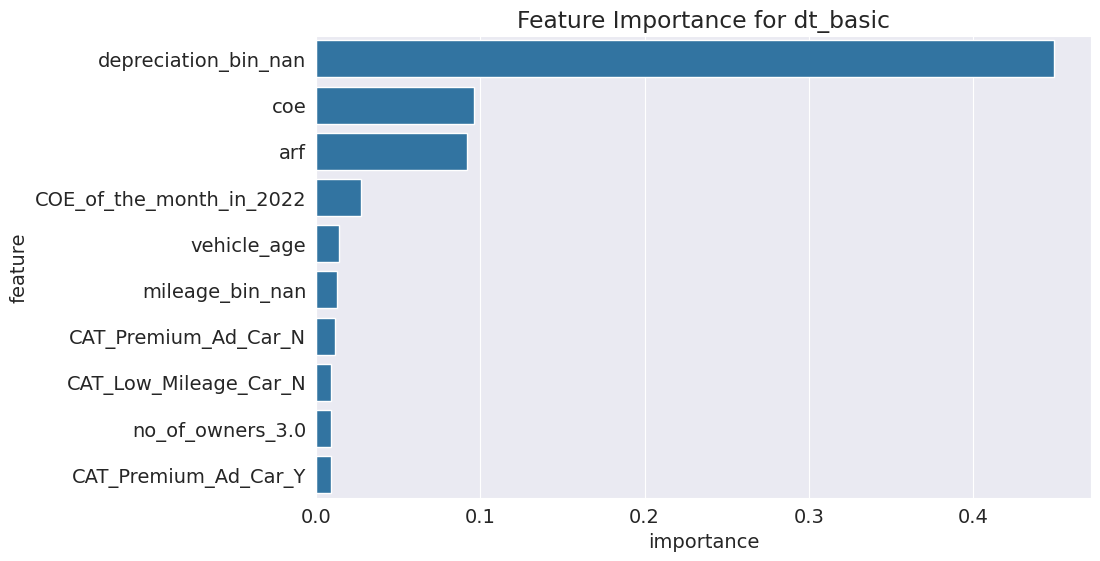

In [ ]:
# plotting the top 10 important features for dt_basic
dt_basic_feature_importances = dt_basic.feature_importances_

dt_basic_importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': dt_basic.feature_importances_
}).sort_values('importance', ascending=False)

dt_basic_importance_df.head(10)

plt.title('Feature Importance for dt_basic')
sns.barplot(data=dt_basic_importance_df.head(10), x='importance', y='feature');

In [ ]:
# getting the cross validation scores for each fold

dt_basic_cv_scores = cross_val_score(dt_basic, x_train, y_train, cv=5, scoring='accuracy')

# Display accuracy on each fold
for fold, score in enumerate(dt_basic_cv_scores, 1):
    print(f'Fold {fold}: Accuracy = {score:.4f}')

dt_basic_average_accuracy = dt_basic_cv_scores.mean()
print(f"Average accuracy is: {dt_basic_average_accuracy}") # dt_basic average validation accuracy is 0.7327727715005897

Fold 1: Accuracy = 0.7366
Fold 2: Accuracy = 0.7345
Fold 3: Accuracy = 0.7302
Fold 4: Accuracy = 0.7242
Fold 5: Accuracy = 0.7384
Average accuracy is: 0.7327727715005897


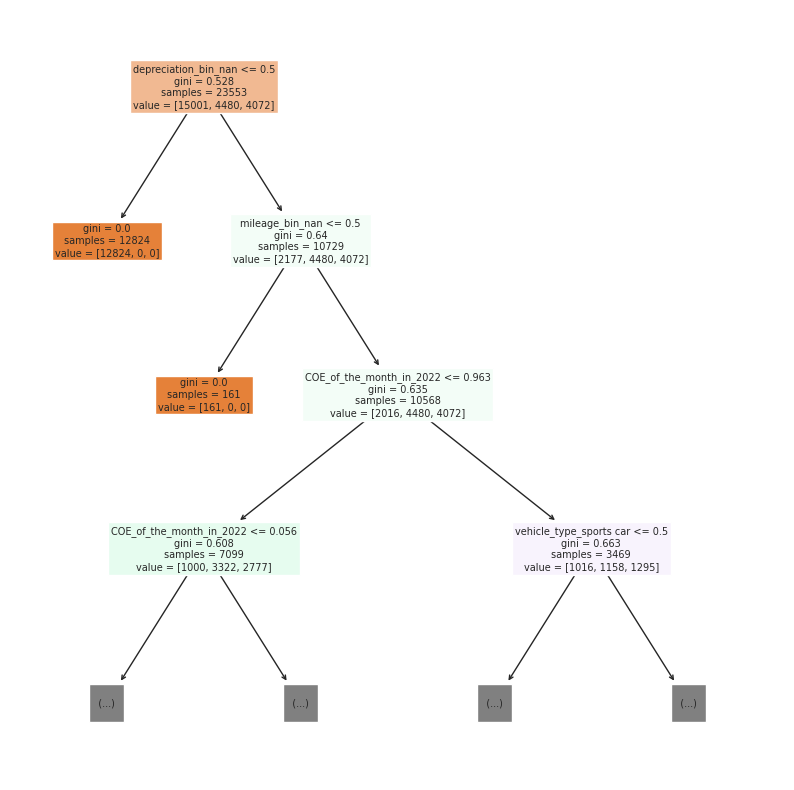

In [ ]:
from sklearn.tree import plot_tree

# visualize decision tree
plt.figure(figsize=(10,10))
plot_tree(dt_basic, feature_names=x_train.columns, max_depth=3, filled=True);

In [ ]:
# performing prediction
prediction_dt_basic = dt_basic.predict(x_test)

# confusion matrix of dt_basic
cm_dt_basic = confusion_matrix(y_test,prediction_dt_basic)
cm_dt_basic_df = pd.DataFrame(cm_dt_basic, index=['Actual Class 1', 'Actual Class 2', 'Actual Class 3'], columns=['Predicted Class 1', 'Predicted Class 2', 'Predicted Class 3'])
print("Class 1: Not sold within Three Weeks\nClass 2: Sold in Less Than One Week\nClass 3: Sold in Less Than Three Weeks")
print("Confusion Matrix:")
print(cm_dt_basic_df)

# classification report of dt_basic
print(classification_report(y_test,prediction_dt_basic))

print(f"Accuracy of dt_basic = {accuracy_score(y_test,prediction_dt_basic)}") # dt_basic test accuracy is 0.7350993377483444

Class 1: Not sold within Three Weeks
Class 2: Sold in Less Than One Week
Class 3: Sold in Less Than Three Weeks
Confusion Matrix:
                Predicted Class 1  Predicted Class 2  Predicted Class 3
Actual Class 1               3371                144                204
Actual Class 2                176                542                406
Actual Class 3                199                431                416
                               precision    recall  f1-score   support

  Not sold within Three Weeks       0.90      0.91      0.90      3719
   Sold in Less Than One Week       0.49      0.48      0.48      1124
Sold in Less Than Three Weeks       0.41      0.40      0.40      1046

                     accuracy                           0.74      5889
                    macro avg       0.60      0.60      0.60      5889
                 weighted avg       0.73      0.74      0.73      5889

Accuracy of dt_basic = 0.7350993377483444


## Decision Tree Hyperparameter Tuning

### Random Search (First approach)

In [ ]:
import time # model to use class time
from sklearn.metrics import f1_score, make_scorer

In [ ]:
# function to take note of the time required for each hyperparameter tuning
def timeit(method):
  def timed(*args, **kw):
    ts = time.time()
    result = method(*args, **kw)
    te = time.time()
    if 'log_time' in kw:
      name = kw.get('log_name', method.__name__.upper())
      kw['log_time'][name] = int((te-ts)*1000)
    else:
      print('%r %2.2f ms' % \
       (method.__name__, (te-ts)*1000))
    return result
  return timed

In [ ]:
# Some common hyperparameters for DecisionTreeClassifier
dt_rand_parameters = {'max_depth':[20,30,40,50,60],
                      'min_samples_leaf': [3,4,5,6,7],
                      'min_samples_split': [4,5,6,7,8],
                      'criterion': ['gini', 'entropy']
                      }

# Meaurement Metric chosen is Accuracy
scorer = make_scorer(accuracy_score)

In [ ]:
# function to perform either Random or Grid Search
@timeit
def generate_clf_from_search(grid_or_random, clf, parameters, scorer, x, y):
  if grid_or_random == "Grid":
    search_obj = GridSearchCV(clf, parameters, scoring=scorer)
  elif grid_or_random == "Random":
    search_obj = RandomizedSearchCV(clf, parameters, scoring=scorer, random_state=42)
  fit_obj = search_obj.fit(x, y)
  best_clf = fit_obj.best_estimator_
  return best_clf

In [ ]:
# first use randomized search
best_dt_clf_random = generate_clf_from_search("Random",
                                           dt_clf,
                                           dt_rand_parameters,
                                           scorer,
                                           x_train,
                                           y_train)

'generate_clf_from_search' 14044.80 ms


In [ ]:
# obtain average validation score for DecisionTreeClassifier with Hyperparameters obtained via RandomizedSearchCV
dt_clf_rand_scores = cross_val_score(best_dt_clf_random, x_train, y_train, cv=5, scoring=scorer)
dt_clf_rand_scores.mean() # best_dt_clf_random average validation accuracy is 0.7396508059693152

print(f"The mean cross validation accuracy for decision tree with 'best' params found in randomized search is {dt_clf_rand_scores.mean()}")

The mean cross validation accuracy for decision tree with 'best' params found in randomized search is 0.7396508059693152


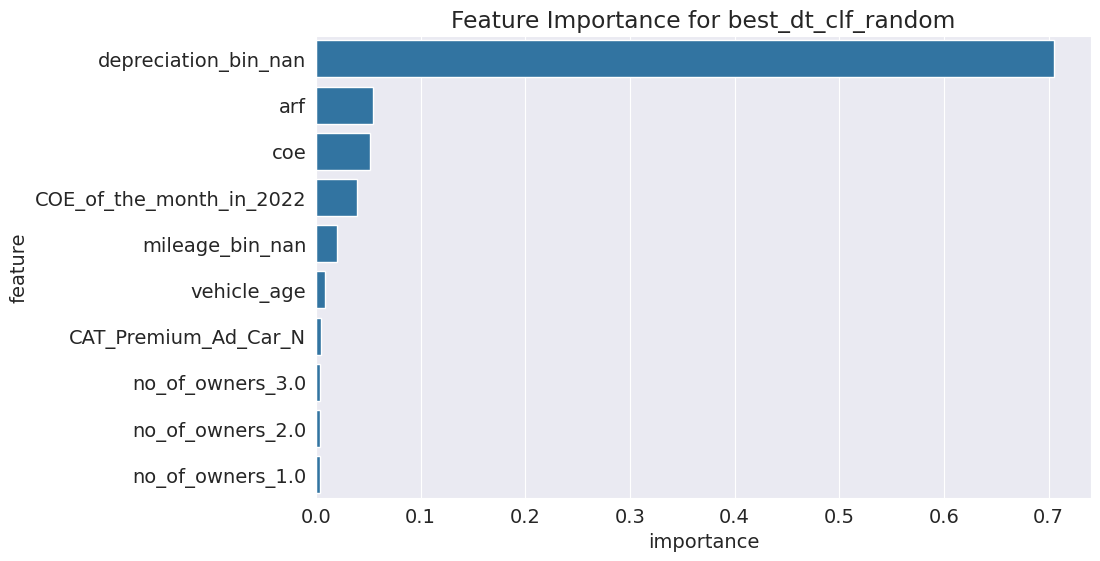

In [ ]:
# plotting the top 10 important features for best_dt_clf_random
dt_random_feature_importances = best_dt_clf_random.feature_importances_

dt_rand_importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': best_dt_clf_random.feature_importances_
}).sort_values('importance', ascending=False)

dt_rand_importance_df.head(10)

plt.title('Feature Importance for best_dt_clf_random')
sns.barplot(data=dt_rand_importance_df.head(10), x='importance', y='feature');

In [ ]:
# using best_dt_clf_random for train and test data
best_dt_clf_random.fit(x_train, y_train)

best_dt_clf_random_train_predictions = best_dt_clf_random.predict(x_train)
best_dt_clf_random_test_predictions = best_dt_clf_random.predict(x_test)

print('The training accuracy score is ', accuracy_score(best_dt_clf_random_train_predictions, y_train)) # 0.8413365600985012
print('The testing accuracy score is ', accuracy_score(best_dt_clf_random_test_predictions, y_test)) # 0.7425708948887757

The training accuracy score is  0.8413365600985012
The testing accuracy score is  0.7425708948887757


In [ ]:
# inspection the best params obtained via RandomizedSearchCV
best_dt_clf_rand_params = best_dt_clf_random.get_params()
for key, value in best_dt_clf_rand_params.items():
  print(f"Key: {key}, Value: {value}")

Key: ccp_alpha, Value: 0.0
Key: class_weight, Value: None
Key: criterion, Value: gini
Key: max_depth, Value: 20
Key: max_features, Value: None
Key: max_leaf_nodes, Value: None
Key: min_impurity_decrease, Value: 0.0
Key: min_samples_leaf, Value: 4
Key: min_samples_split, Value: 5
Key: min_weight_fraction_leaf, Value: 0.0
Key: random_state, Value: 42
Key: splitter, Value: best


In [ ]:
### comparing with the previous parameters
'''
parameters = {'max_depth':[20,30,40,50,60],
              'min_samples_leaf': [3,4,5,6,7],
              'min_samples_split': [4,5,6,7,8],
              'criterion': ['gini', 'entropy']
              }
'''

# zooming in for fine-tuning
new_parameters = {'max_depth':[16,18,20,22,24],
                  'min_samples_leaf': [5,6,7,8,9],
                  'min_samples_split': [5,6,7,8,9],
                  'criterion': ['gini']
                  }

In [ ]:
# zooming in for fine-tuning
new_parameters = {'max_depth':[16,18,20,22,24], # zooming in smaller denomination
                  'min_samples_leaf': [5,6,7,8,9], # raise to higher level as previous hyperparameter is of lower range
                  'min_samples_split': [5,6,7,8,9], # lower to lower level as previous hyperparameter is of higher range
                  'criterion': ['gini']
                  }

In [ ]:
best_dt_clf_grid = generate_clf_from_search("Grid",
                                            dt_clf,
                                            new_parameters, # using the new parameters that were zoomed into via RandomizedSearch
                                            scorer,
                                            x_train,
                                            y_train)

'generate_clf_from_search' 165578.18 ms


In [ ]:
# obtain average validation score for DecisionTreeClassifier with Hyperparameters obtained via GridSearchCV
dt_clf_grid_scores = cross_val_score(best_dt_clf_grid, x_train, y_train, cv=5, scoring=scorer)
dt_clf_grid_scores.mean()

print(f"The mean cross validation accuracy for decision tree with 'best' params found in randomized search is {dt_clf_grid_scores.mean()}")

The mean cross validation accuracy for decision tree with 'best' params found in randomized search is 0.7435570992766174


In [ ]:
# using best_dt_clf_grid for train and test data
best_dt_clf_grid.fit(x_train, y_train)

best_dt_clf_grid_train_predictions = best_dt_clf_grid.predict(x_train)
best_dt_clf_grid__test_predictions = best_dt_clf_grid.predict(x_test)

print('The training accuracy score is ', accuracy_score(best_dt_clf_grid_train_predictions, y_train)) # 0.8041013883581709
print('The testing accuracy score is ', accuracy_score(best_dt_clf_grid__test_predictions, y_test)) # 0.7500424520292069

The training accuracy score is  0.8041013883581709
The testing accuracy score is  0.7500424520292069


In [ ]:
# display all hyperparamters obtained via GridSearchCV

best_dt_clf_grid_params = best_dt_clf_grid.get_params()

for key, value in best_dt_clf_grid_params.items():
  print(f"Key: {key}, Value: {value}")

Key: ccp_alpha, Value: 0.0
Key: class_weight, Value: None
Key: criterion, Value: gini
Key: max_depth, Value: 16
Key: max_features, Value: None
Key: max_leaf_nodes, Value: None
Key: min_impurity_decrease, Value: 0.0
Key: min_samples_leaf, Value: 8
Key: min_samples_split, Value: 5
Key: min_weight_fraction_leaf, Value: 0.0
Key: random_state, Value: 42
Key: splitter, Value: best


In [ ]:
# performing prediction
prediction_dt_grid = best_dt_clf_grid.predict(x_test)

# confusion matrix of dt_grid
cm_dt_grid = confusion_matrix(y_test,prediction_dt_grid)
cm_dt_grid_df = pd.DataFrame(cm_dt_grid, index=['Actual Class 1', 'Actual Class 2', 'Actual Class 3'], columns=['Predicted Class 1', 'Predicted Class 2', 'Predicted Class 3'])
print("Class 1: Not sold within Three Weeks\nClass 2: Sold in Less Than One Week\nClass 3: Sold in Less Than Three Weeks")
print("Confusion Matrix:")
print(cm_dt_grid_df)

# classification report of dt_grid
print(classification_report(y_test,prediction_dt_grid))

print(f"Accuracy of dt_grid = {accuracy_score(y_test,prediction_dt_grid)}") # dt_grid test accuracy is 0.7500424520292069

Class 1: Not sold within Three Weeks
Class 2: Sold in Less Than One Week
Class 3: Sold in Less Than Three Weeks
Confusion Matrix:
                Predicted Class 1  Predicted Class 2  Predicted Class 3
Actual Class 1               3307                164                248
Actual Class 2                 77                585                462
Actual Class 3                 92                429                525
                               precision    recall  f1-score   support

  Not sold within Three Weeks       0.95      0.89      0.92      3719
   Sold in Less Than One Week       0.50      0.52      0.51      1124
Sold in Less Than Three Weeks       0.43      0.50      0.46      1046

                     accuracy                           0.75      5889
                    macro avg       0.62      0.64      0.63      5889
                 weighted avg       0.77      0.75      0.76      5889

Accuracy of dt_grid = 0.7500424520292069


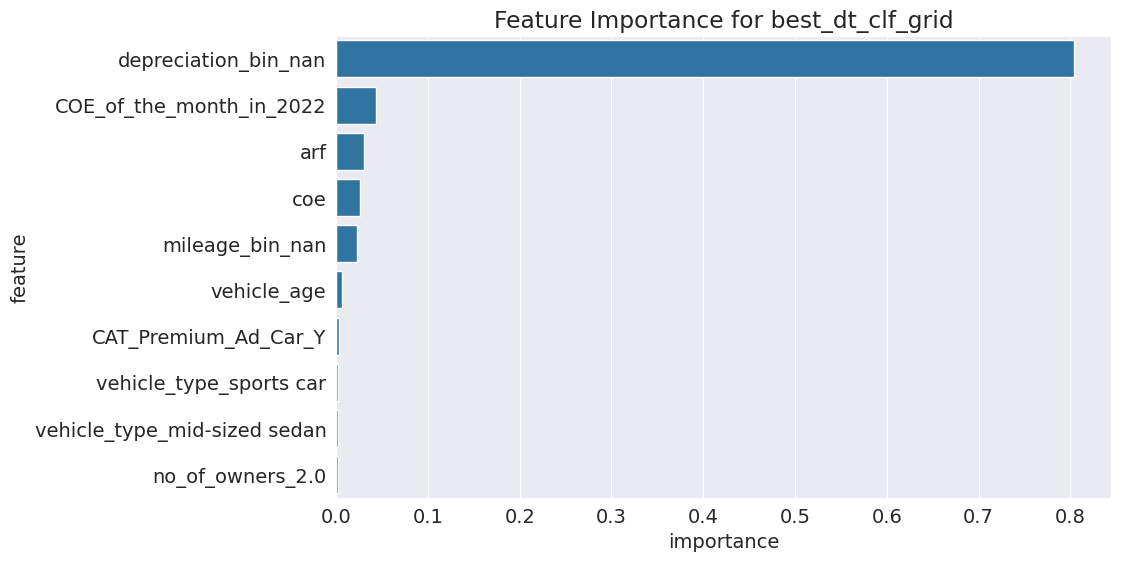

In [ ]:
# plotting the top 10 important features for best_dt_clf_grid
dt_grid_feature_importances = best_dt_clf_grid.feature_importances_

dt_grid_importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': best_dt_clf_grid.feature_importances_
}).sort_values('importance', ascending=False)

dt_grid_importance_df.head(10)

plt.title('Feature Importance for best_dt_clf_grid')
sns.barplot(data=dt_grid_importance_df.head(10), x='importance', y='feature');

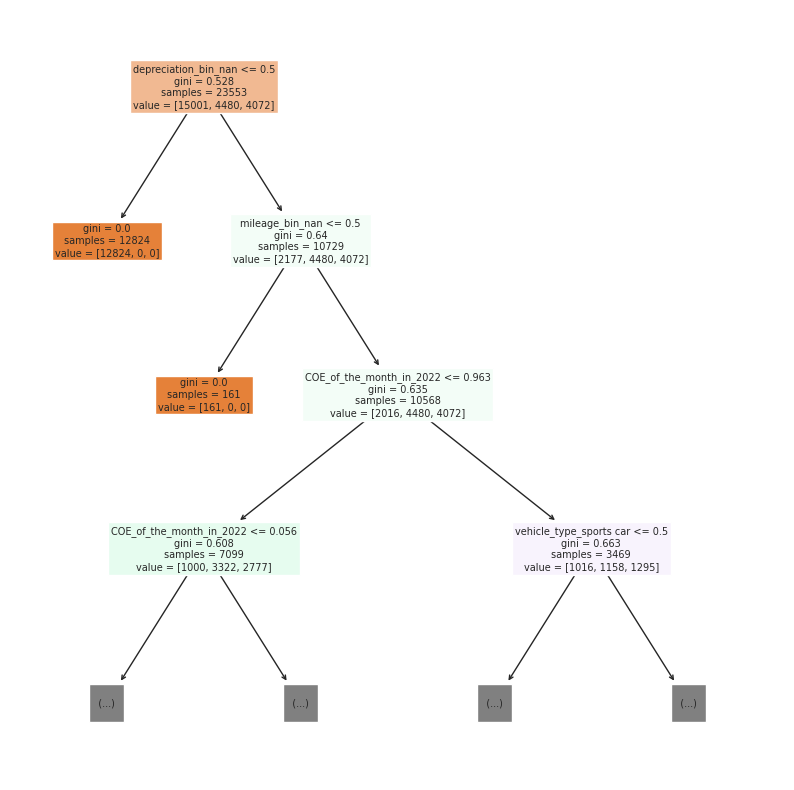

In [ ]:
# visualize decision tree for dt_grid_copied
plt.figure(figsize=(10,10))
plot_tree(best_dt_clf_grid, feature_names=x_train.columns, max_depth=3, filled=True);

# Random Forest

In [ ]:
# inmport package necessary for RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# instantiate rf_clf with same random seed for use in later randomized and grid search
rf_clf = RandomForestClassifier(random_state=42)

In [ ]:
rf_basic = RandomForestClassifier(random_state=42)
rf_basic.fit(x_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix
rf_basic_train_preds = rf_basic.predict(x_train)

pd.value_counts(rf_basic_train_preds)
accuracy_score(y_train, rf_basic_train_preds)

# rf_basic fully learns the training dataset (overfitting) # 0.9984715322888804

0.9984715322888804

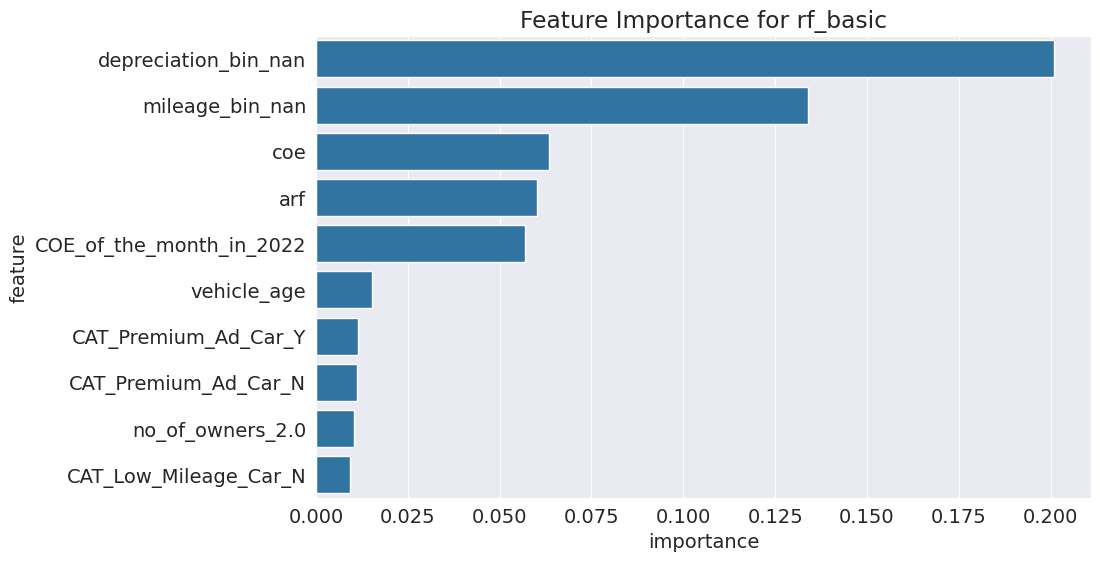

In [ ]:
# plotting the top 10 important features for dt_basic
rf_basic_feature_importances = rf_basic.feature_importances_

rf_basic_importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': rf_basic.feature_importances_
}).sort_values('importance', ascending=False)

rf_basic_importance_df.head(10)

plt.title('Feature Importance for rf_basic')
sns.barplot(data=rf_basic_importance_df.head(10), x='importance', y='feature'); # Using random forest method, the importance of "depreciation_bin_nan" has been reduced.

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
rf_basic_cv_scores = cross_val_score(rf_basic, x_train, y_train, cv=5, scoring='accuracy')

In [ ]:
# Display accuracy on each fold
for fold, score in enumerate(rf_basic_cv_scores, 1):
    print(f'Fold {fold}: Accuracy = {score:.4f}')

rf_basic_average_accuracy = rf_basic_cv_scores.mean()
print(f"Average accuracy is: {rf_basic_average_accuracy}") # rf_basic average validation accuracy is 0.7465293091427616

Fold 1: Accuracy = 0.7504
Fold 2: Accuracy = 0.7436
Fold 3: Accuracy = 0.7408
Fold 4: Accuracy = 0.7471
Fold 5: Accuracy = 0.7507
Average accuracy is: 0.7465293091427616


In [ ]:
# performing prediction
prediction_rf_basic = rf_basic.predict(x_test)

# confusion matrix of rf_basic
cm_rf_basic = confusion_matrix(y_test,prediction_rf_basic)
cm_rf_basic_df = pd.DataFrame(cm_rf_basic, index=['Actual Class 1', 'Actual Class 2', 'Actual Class 3'], columns=['Predicted Class 1', 'Predicted Class 2', 'Predicted Class 3'])
print("Class 1: Not sold within Three Weeks\nClass 2: Sold in Less Than One Week\nClass 3: Sold in Less Than Three Weeks")
print("Confusion Matrix:")
print(cm_rf_basic_df)

# classification report of dt_basic
print(classification_report(y_test,prediction_rf_basic))

print(f"Accuracy of rf_basic = {accuracy_score(y_test,prediction_rf_basic)}") # rf_basic test accuracy is 0.7452878247580235

Class 1: Not sold within Three Weeks
Class 2: Sold in Less Than One Week
Class 3: Sold in Less Than Three Weeks
Confusion Matrix:
                Predicted Class 1  Predicted Class 2  Predicted Class 3
Actual Class 1               3333                171                215
Actual Class 2                 81                642                401
Actual Class 3                117                515                414
                               precision    recall  f1-score   support

  Not sold within Three Weeks       0.94      0.90      0.92      3719
   Sold in Less Than One Week       0.48      0.57      0.52      1124
Sold in Less Than Three Weeks       0.40      0.40      0.40      1046

                     accuracy                           0.75      5889
                    macro avg       0.61      0.62      0.61      5889
                 weighted avg       0.76      0.75      0.75      5889

Accuracy of rf_basic = 0.7452878247580235


# Random Forest Hyperparameter Tuning:

## Random Search

In [ ]:
# Some common hyperparameters for RandomForestClassifier
rf_rand_parameters = {'max_depth':[15,20,25,30,35],
                      'min_samples_split': [6,7,8,9,10],
                      'max_leaf_nodes': [50,100,150,200,250],
                      'min_samples_leaf': [5,6,7,8,9],
                      'n_estimators': [50,60,70,80,90],
                      'criterion': ['gini', 'entropy', 'log_loss'],
                      'max_features': ['sqrt', 'log2'] # limiting max_features to 'sqrt', 'log2', removing None
                      }
scorer = make_scorer(accuracy_score)

In [ ]:
# Use randomized search
# the below calls for the function defined above
best_rf_clf_random = generate_clf_from_search("Random",
                                              rf_clf,
                                              rf_rand_parameters,
                                              scorer,
                                              x_train,
                                              y_train)

'generate_clf_from_search' 70218.24 ms


In [ ]:
# obtain average validation score for RandomForestClassifier with Hyperparameters obtained via RandomizedSearchCV
rf_clf_rand_scores = cross_val_score(best_rf_clf_random, x_train, y_train, cv=5, scoring=scorer)
rf_clf_rand_scores.mean()

print(f"The mean cross validation accuracy for random forest with 'best' params found in randomized search is {rf_clf_rand_scores.mean()}") # 0.7548086265103897

The mean cross validation accuracy for random forest with 'best' params found in randomized search is 0.7535773301948143


In [ ]:
best_rf_clf_random.fit(x_train, y_train)

best_rf_clf_random_train_predictions = best_rf_clf_random.predict(x_train)
best_rf_clf_random_test_predictions = best_rf_clf_random.predict(x_test)

print('The training accuracy score is ', accuracy_score(best_rf_clf_random_train_predictions, y_train)) # 0.8114465248588291
print('The testing accuracy score is ', accuracy_score(best_rf_clf_random_test_predictions, y_test)) # 0.760400747155714

The training accuracy score is  0.7723432259160192
The testing accuracy score is  0.7563253523518424


In [ ]:
# performing prediction
prediction_rf_rand = best_rf_clf_random.predict(x_test)

# confusion matrix of rf_rand
cm_rf_rand = confusion_matrix(y_test,prediction_rf_rand)
cm_rf_rand_df = pd.DataFrame(cm_rf_rand, index=['Actual Class 1', 'Actual Class 2', 'Actual Class 3'], columns=['Predicted Class 1', 'Predicted Class 2', 'Predicted Class 3'])
print("Class 1: Not sold within Three Weeks\nClass 2: Sold in Less Than One Week\nClass 3: Sold in Less Than Three Weeks")
print("Confusion Matrix:")
print(cm_rf_rand_df)

# classification report of rf_rand
print(classification_report(y_test,prediction_rf_rand))

print(f"Accuracy of rf_rand = {accuracy_score(y_test,prediction_rf_rand)}") # rf_rand test accuracy is 0.760400747155714

Class 1: Not sold within Three Weeks
Class 2: Sold in Less Than One Week
Class 3: Sold in Less Than Three Weeks
Confusion Matrix:
                Predicted Class 1  Predicted Class 2  Predicted Class 3
Actual Class 1               3295                285                139
Actual Class 2                 31                914                179
Actual Class 3                 46                755                245
                               precision    recall  f1-score   support

  Not sold within Three Weeks       0.98      0.89      0.93      3719
   Sold in Less Than One Week       0.47      0.81      0.59      1124
Sold in Less Than Three Weeks       0.44      0.23      0.30      1046

                     accuracy                           0.76      5889
                    macro avg       0.63      0.64      0.61      5889
                 weighted avg       0.78      0.76      0.75      5889

Accuracy of rf_rand = 0.7563253523518424


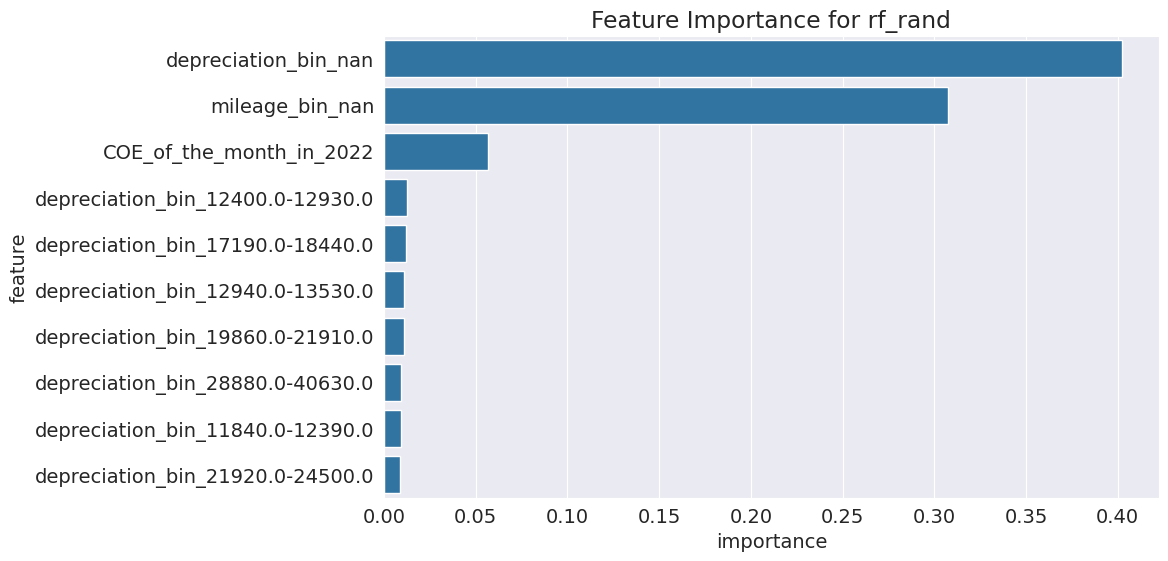

In [ ]:
# plotting the top 10 important features for rf_rand
rf_rand_feature_importances = best_rf_clf_random.feature_importances_

rf_rand_importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': best_rf_clf_random.feature_importances_
}).sort_values('importance', ascending=False)

rf_rand_importance_df.head(10)

plt.title('Feature Importance for rf_rand')
sns.barplot(data=rf_rand_importance_df.head(10), x='importance', y='feature'); # Using random forest method, the importance of "depreciation_bin_nan" has been reduced.

In [ ]:
# display all hyperparamters obtained via RandomizedSearchCV

best_rf_clf_rand_params = best_rf_clf_random.get_params()

for key, value in best_rf_clf_rand_params.items():
  print(f"Key: {key}, Value: {value}")

Key: bootstrap, Value: True
Key: ccp_alpha, Value: 0.0
Key: class_weight, Value: None
Key: criterion, Value: entropy
Key: max_depth, Value: 35
Key: max_features, Value: sqrt
Key: max_leaf_nodes, Value: 50
Key: max_samples, Value: None
Key: min_impurity_decrease, Value: 0.0
Key: min_samples_leaf, Value: 9
Key: min_samples_split, Value: 8
Key: min_weight_fraction_leaf, Value: 0.0
Key: n_estimators, Value: 80
Key: n_jobs, Value: None
Key: oob_score, Value: False
Key: random_state, Value: 42
Key: verbose, Value: 0
Key: warm_start, Value: False
